In [72]:
import skimage.io

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

## Load a sample image

https://www.pexels.com/photo/assorted-plastic-figures-1619844/

(780, 1280, 3)


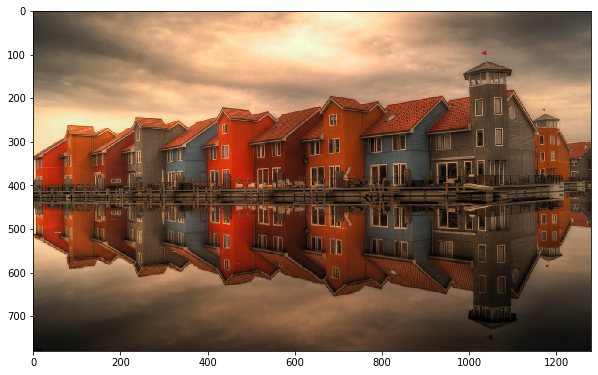

In [73]:
figures = skimage.io.imread('datasets/images/buildings-cloudy-colorful.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(figures)

print(figures.shape) 

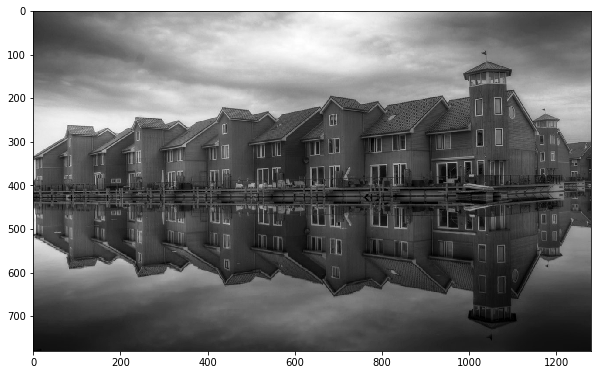

(780, 1280)


In [74]:
image = skimage.color.rgb2gray(figures)

plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()

print(image.shape)

In [75]:
def apply_convolution(image, kernel):
    input_shape = (1, image.shape[0], image.shape[1], 1)

    input_placeholder = tf.placeholder(dtype=tf.float32, shape=input_shape)
    
    image_4d = image[np.newaxis, :, :, np.newaxis]
    
    with tf.name_scope('convolution'):
    
        conv_w = tf.constant(kernel, dtype=tf.float32, shape=(3, 3, 1, 1))

        output = tf.nn.conv2d(input=input_placeholder, 
                              filter=conv_w, 
                              strides=[1, 1, 1, 1], 
                              padding='SAME')
        with tf.Session() as sess:
            result = sess.run(output, 
                              feed_dict={input_placeholder: image_4d})
        
        return result

In [76]:
def display_original_convolutionresult(image, result):
    fig, axes = plt.subplots(1, 2, 
                             figsize=(10, 10), 
                             sharex=True, sharey=True)

    ax = axes.ravel()

    ax[0].imshow(image, cmap='gray')

    ax[1].imshow(result[0, :, :, 0], cmap='gray')

    plt.tight_layout()
    plt.show()    

## Applying kernels

### Gaussian blur

In [77]:
kernel_gaussianblur = [  [1/16, 2/16, 1/16], 
                         [2/16, 4/16, 2/16], 
                         [1/16, 2/16, 1/16] ]

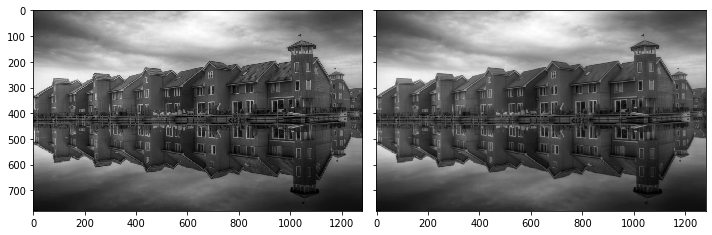

In [78]:
result = apply_convolution(image, kernel_gaussianblur)

display_original_convolutionresult(image, result)

### Image sharpen

In [79]:
kernel_sharpen = [ [0, -1,  0 ], 
                   [-1 , 5,  -1 ], 
                   [0, -1,  0 ] ]

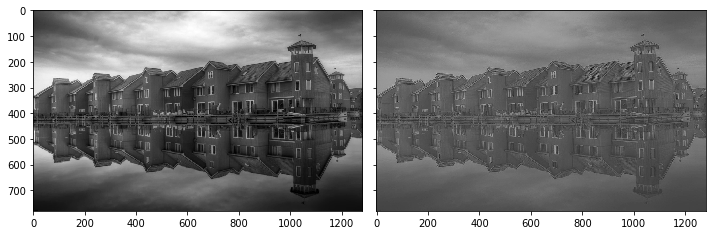

In [80]:
result = apply_convolution(image, kernel_sharpen)

display_original_convolutionresult(image, result)

### Canny's horizontal Detector

In [81]:
kernel_horizontal = [ [ -1,  -2, -1 ], 
                      [  0,   0,  0 ],
                      [  1,   2,  1 ] ]

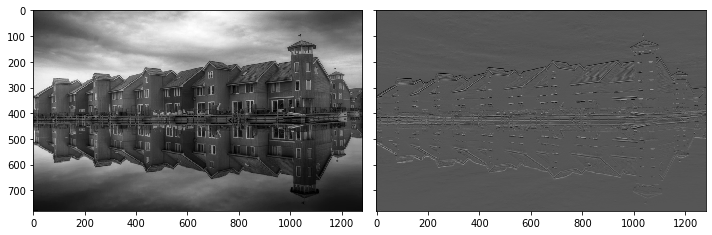

In [82]:
result = apply_convolution(image, kernel_horizontal)

display_original_convolutionresult(image, result)

### The Sobel Edge Operator for horizontal lines

In [83]:
kernel_sobel_horizontal = [ [-1, -2, -1], 
                            [0,   0,  0], 
                            [1,   2,  1] ]

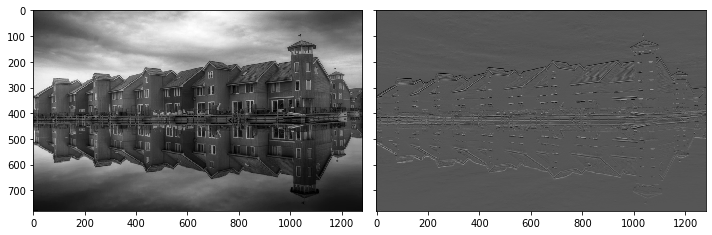

In [84]:
result = apply_convolution(image, kernel_sobel_horizontal)

display_original_convolutionresult(image, result)

### Canny's vertical line Detector

In [85]:
kernel_vertical = [ [ -1,  0,  1 ], 
                    [ -2,  0,  2 ],
                    [ -1,  0,  1 ] ]

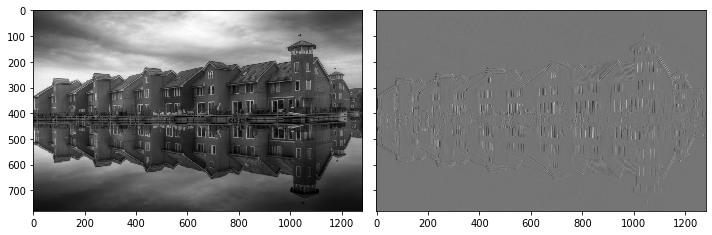

In [86]:
result = apply_convolution(image, kernel_vertical)

display_original_convolutionresult(image, result)

### The Sobel Edge Operator for vertical lines

In [87]:
kernel_sobel_vertical = [ [-1, 2, -1], 
                          [-1, 2, -1], 
                          [-1, 2, -1] ]

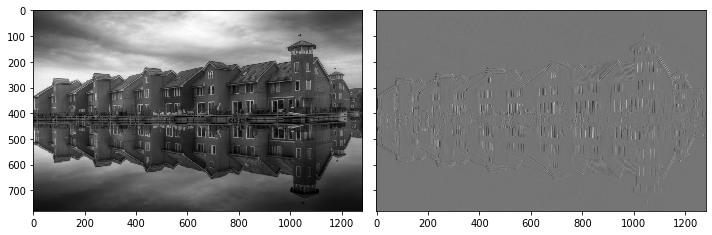

In [88]:
result = apply_convolution(image, kernel_vertical)

display_original_convolutionresult(image, result)

### 45 Degree line detection

In [89]:
kernel_45 = [ [-1, -1,  2 ], 
              [-1 , 2, -1 ], 
              [ 2, -1, -1 ] ]

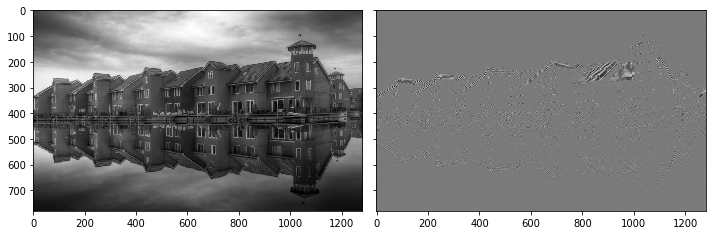

In [90]:
result = apply_convolution(image, kernel_45)

display_original_convolutionresult(image, result)

### 135 degree line detection

In [91]:
kernel_135 = [ [2, -1,  -1 ], 
               [-1 , 2, -1 ], 
               [-1, -1,  2 ] ]

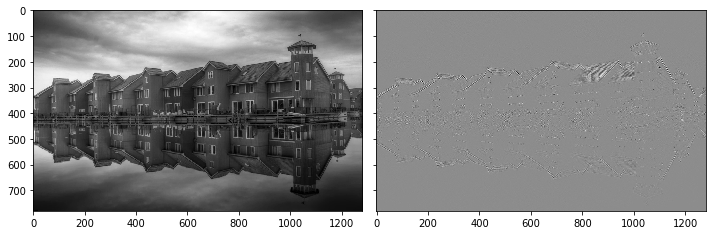

In [92]:
result = apply_convolution(image, kernel_135)

display_original_convolutionresult(image, result)

### Edge detection

In [93]:
kernel_edge = [ [0, 1, 0 ], 
                [1, -4, 1 ], 
                [0, 1, 0 ] ]

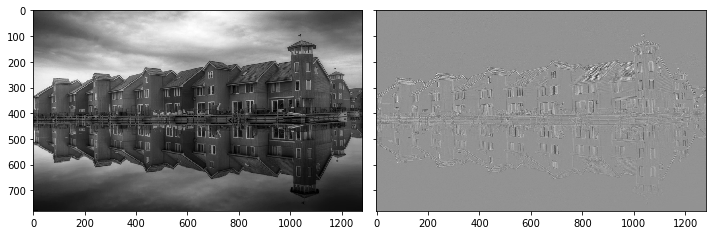

In [94]:
result = apply_convolution(image, kernel_edge)

display_original_convolutionresult(image, result)

In [95]:
kernel_edge = [ [-1, -1,  -1 ], 
                [-1 , 8,  -1 ], 
                [-1, -1,  -1 ] ]

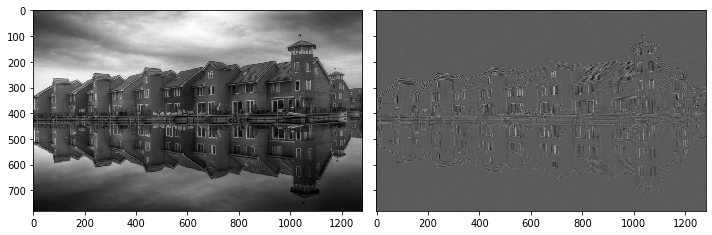

In [96]:
result = apply_convolution(image, kernel_edge)

display_original_convolutionresult(image, result)